## Analyzing My Streaming Data from Spotify

### 1. Data Cleaning / Transformation

#### 1.1 Creating the Dataframe by JSON files

In [1]:
# Importing the libraries
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

To get the Streaming data from Spotify, go to the link: https://www.spotify.com/us/account/privacy/ and find the option called "Extended Streaming history", ask for download and Spotify will send an e-mail with a compacted folder having a bunch of Json Files and a PDF explaing the meaning of each field.

In [2]:
df0 = pd.read_json('endsong_0.json')
df1 = pd.read_json('endsong_1.json')
df2 = pd.read_json('endsong_2.json')
df3 = pd.read_json('endsong_3.json')
df4 = pd.read_json('endsong_4.json')
df5 = pd.read_json('endsong_5.json')
df6 = pd.read_json('endsong_6.json')
df7 = pd.read_json('endsong_7.json')
df8 = pd.read_json('endsong_8.json')
df9 = pd.read_json('endsong_9.json')
df10 = pd.read_json('endsong_10.json')
df11 = pd.read_json('endsong_11.json')
df12 = pd.read_json('endsong_12.json')
df13 = pd.read_json('endsong_13.json')

df = pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13])

In [3]:
df.shape

(222083, 21)

In [4]:
df.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2020-10-10T16:08:37Z,9uvq1zbwvtr3im22brbiwrrc5,Windows 10 (10.0.18363; x64; AppX),820,BR,191.163.23.34,unknown,Azrael,Marduk,La Grande Danse Macabre,...,None,None,None,clickrow,fwdbtn,True,NaN,False,1602346116852,False
1,2022-12-30T00:31:03Z,9uvq1zbwvtr3im22brbiwrrc5,ios,1532,BR,177.27.8.25,unknown,None,None,None,...,None,None,None,fwdbtn,fwdbtn,True,1.0,True,1672360262,False
2,2021-07-07T01:29:40Z,9uvq1zbwvtr3im22brbiwrrc5,Windows 10 (10.0.19042; x64; AppX),0,BR,179.35.28.229,unknown,Seyn Todt in Schwarz,Belphegor,Pestapokalypse VI,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1625621379855,False
3,2020-11-04T21:08:16Z,9uvq1zbwvtr3im22brbiwrrc5,"Android OS 9 API 28 (motorola, moto g(6) play)",1214,BR,191.163.13.188,unknown,Question!,System Of A Down,Mezmerize,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1604524093445,False
4,2019-01-09T02:05:24Z,9uvq1zbwvtr3im22brbiwrrc5,"Android OS 8.0.0 API 26 (motorola, moto g(6) p...",1480,BR,179.35.51.67,unknown,Lips Of An Angel,Hinder,Extreme Behavior,...,None,None,None,fwdbtn,fwdbtn,True,NaN,True,1546957479937,False


The explanation of each field is in the file "ReadMeFirst_ExtendedStreamingHistory.pdf" in the same directory

#### 

#### 1.2 Cleaning the Data

Removing the useless columns and keeping only the ones related directly to streaming of songs and the ones useful for my analysis

In [5]:
df = df.drop(columns = ['username','platform','conn_country','ip_addr_decrypted','user_agent_decrypted','spotify_track_uri',
'spotify_episode_uri','reason_start','reason_end','shuffle','skipped','offline','offline_timestamp','incognito_mode','episode_name','episode_show_name'])
df.head()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name
0,2020-10-10T16:08:37Z,820,Azrael,Marduk,La Grande Danse Macabre
1,2022-12-30T00:31:03Z,1532,None,None,None
2,2021-07-07T01:29:40Z,0,Seyn Todt in Schwarz,Belphegor,Pestapokalypse VI
3,2020-11-04T21:08:16Z,1214,Question!,System Of A Down,Mezmerize
4,2019-01-09T02:05:24Z,1480,Lips Of An Angel,Hinder,Extreme Behavior


In [6]:
df = df.sort_values(by='ts', ascending = True)
df.head(5)

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name
9844,2018-11-01T17:12:41Z,2117,Spirit Crusher,Death,The Sound of Perserverence (Deluxe Version)
10211,2018-11-01T17:15:34Z,10075,Scavenger of Human Sorrow,Death,The Sound of Perserverence (Deluxe Version)
12192,2018-11-01T17:15:34Z,10075,Scavenger of Human Sorrow,Death,The Sound of Perserverence (Deluxe Version)
4803,2018-11-01T17:15:37Z,1949,Flesh and the Power It Holds,Death,The Sound of Perserverence (Deluxe Version)
10255,2018-11-01T17:15:37Z,1949,Flesh and the Power It Holds,Death,The Sound of Perserverence (Deluxe Version)


In [7]:
df.shape

(222083, 5)

After ordering by Date, I realized duplicated values, so I removed them using the columns 'ts' and 'ms_played'

In [8]:
df = df.drop_duplicates(subset=['ts','ms_played'], keep='last')

In [9]:
df.shape

(216665, 5)

Checking and removing null values, which happen with the fields: 'master_metadata_track_name', 'master_metadata_album_artist_name' and 'master_metadata_album_album_name'

In [10]:
df.isnull().sum()

ts                                       0
ms_played                                0
master_metadata_track_name           17557
master_metadata_album_artist_name    17557
master_metadata_album_album_name     17557
dtype: int64

In [11]:
df = df.dropna()
df.shape

(199108, 5)

In [12]:
df.isnull().sum()

ts                                   0
ms_played                            0
master_metadata_track_name           0
master_metadata_album_artist_name    0
master_metadata_album_album_name     0
dtype: int64

Converting the column 'ts', which is a timestamp, in a datetime. Then I Exctracted Date, Time, Hour, Month_Year, Year and put them in different columns in the end of the DataFrame

In [13]:
df['ts'] = pd.to_datetime(df['ts'])
df['Date'] = df['ts'].dt.date
df['Time'] = df['ts'].dt.time
df['Hour'] = df['ts'].dt.hour
df['Month_Year'] = df['ts'].dt.to_period('M')
df['Year'] = df['ts'].dt.to_period('Y')

df.head()


C:\Users\Alfred\AppData\Local\Temp\ipykernel_22876\1113629016.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month_Year'] = df['ts'].dt.to_period('M')
C:\Users\Alfred\AppData\Local\Temp\ipykernel_22876\1113629016.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Year'] = df['ts'].dt.to_period('Y')


,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,Date,Time,Hour,Month_Year,Year
9844,2018-11-01 17:12:41+00:00,2117,Spirit Crusher,Death,The Sound of Perserverence (Deluxe Version),2018-11-01,17:12:41,17,2018-11,2018
12192,2018-11-01 17:15:34+00:00,10075,Scavenger of Human Sorrow,Death,The Sound of Perserverence (Deluxe Version),2018-11-01,17:15:34,17,2018-11,2018
10255,2018-11-01 17:15:37+00:00,1949,Flesh and the Power It Holds,Death,The Sound of Perserverence (Deluxe Version),2018-11-01,17:15:37,17,2018-11,2018
5367,2018-11-01 17:22:15+00:00,394810,Story to Tell,Death,The Sound of Perserverence (Deluxe Version),2018-11-01,17:22:15,17,2018-11,2018
2630,2018-11-01 17:30:42+00:00,506759,Flesh and the Power It Holds,Death,The Sound of Perserverence (Deluxe Version),2018-11-01,17:30:42,17,2018-11,2018


Converting miliseconds to minutes and giving the column a proper name

In [14]:
df['ms_played'] = df['ms_played']/60000
df.rename(columns={'ms_played':'minutes_played'}, inplace = True)
df.head()

,ts,minutes_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,Date,Time,Hour,Month_Year,Year
9844,2018-11-01 17:12:41+00:00,0.035283,Spirit Crusher,Death,The Sound of Perserverence (Deluxe Version),2018-11-01,17:12:41,17,2018-11,2018
12192,2018-11-01 17:15:34+00:00,0.167917,Scavenger of Human Sorrow,Death,The Sound of Perserverence (Deluxe Version),2018-11-01,17:15:34,17,2018-11,2018
10255,2018-11-01 17:15:37+00:00,0.032483,Flesh and the Power It Holds,Death,The Sound of Perserverence (Deluxe Version),2018-11-01,17:15:37,17,2018-11,2018
5367,2018-11-01 17:22:15+00:00,6.580167,Story to Tell,Death,The Sound of Perserverence (Deluxe Version),2018-11-01,17:22:15,17,2018-11,2018
2630,2018-11-01 17:30:42+00:00,8.445983,Flesh and the Power It Holds,Death,The Sound of Perserverence (Deluxe Version),2018-11-01,17:30:42,17,2018-11,2018


#### 

### 2. Analyzing

In [15]:
# Where the DataFrame Begins
first_date = df['Date'].iloc[0]
# Where it Ends
last_date = df['Date'].iloc[-1]

print("The Range of the DataFrame is between "+str(first_date)+"  and  "+str(last_date))

The Range of the DataFrame is between 2018-11-01  and  2022-10-14


#### 2.1 Plotting Minutes Played per Month

Creating a DataFrame having the total amount of minutes played by Month_Year

In [16]:
minutes_per_month = df.groupby('Month_Year', as_index=False).sum().round(0)
minutes_per_month.head()

C:\Users\Alfred\AppData\Local\Temp\ipykernel_22876\1189587434.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  minutes_per_month = df.groupby('Month_Year', as_index=False).sum().round(0)


,Month_Year,minutes_played,Hour
0,2018-11,3521.0,26732
1,2018-12,4256.0,32289
2,2019-01,5431.0,34774
3,2019-02,4030.0,24371
4,2019-03,3086.0,17015


The month 2022-10 is not complete in the DataFrame, so I'm gonna drop it to analyze the months correctly

In [17]:
minutes_per_month = minutes_per_month.drop([47])

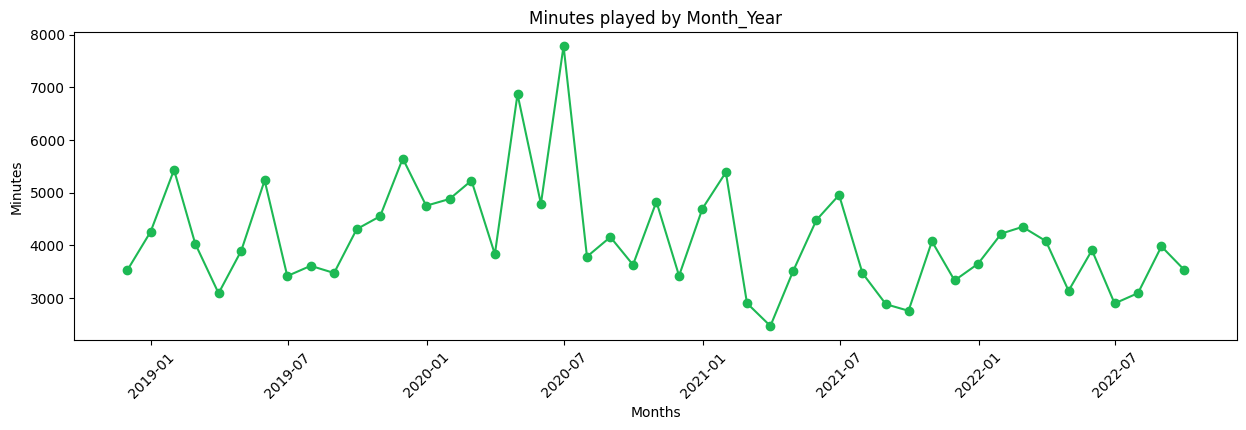

In [18]:
plt.figure(figsize=(15,4))
plt.title('Minutes played by Month_Year')
plt.xlabel('Months')
plt.ylabel('Minutes')
plt.xticks(rotation = 45)
plt.plot_date(minutes_per_month['Month_Year'], minutes_per_month['minutes_played'], linestyle='-', color='#1DB954')

#### 

#### 2.2 Analyzing how much time I spent listening to music in a year

Creating a DataFrame with the total amount of minutes listening to music by year

In [19]:
minutes_per_year = df.groupby('Year', as_index=False).sum().round(0)
minutes_per_year

C:\Users\Alfred\AppData\Local\Temp\ipykernel_22876\10917114.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  minutes_per_year = df.groupby('Year', as_index=False).sum().round(0)


,Year,minutes_played,Hour
0,2018,7776.0,59021
1,2019,51409.0,353489
2,2020,57871.0,854004
3,2021,43824.0,821131
4,2022,34941.0,496890


The years 2018 and 2022 are not complete in the DataFrame, so I will remove them for know

In [20]:
minutes_per_year = minutes_per_year.loc[[1,2,3]]

The total amount of minutes in a year is 525600, so I'm gonna check the percentage of time that I spent each year listening to music

In [21]:
minutes_per_year['minutes_year'] = 525600
minutes_per_year['%'] = (minutes_per_year['minutes_played'] / minutes_per_year['minutes_year'])*100

minutes_per_year

,Year,minutes_played,Hour,minutes_year,%
1,2019,51409.0,353489,525600,9.781012
2,2020,57871.0,854004,525600,11.010464
3,2021,43824.0,821131,525600,8.337900


Well, in 2020 I spent 11% of the year listening to music in spotify. This number is higher than other years due to pandemic and more free time

#### 

#### 2.3 Most Listened Songs, Albums and Bands

Most Listened Songs (Top 5)

In [22]:
top_5_Songs = df.groupby('master_metadata_track_name', as_index=False).sum().round(0)
top_5_Songs.sort_values(by = 'minutes_played', ascending = False).iloc[:, [0,1]].head()

C:\Users\Alfred\AppData\Local\Temp\ipykernel_22876\525712312.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_5_Songs = df.groupby('master_metadata_track_name', as_index=False).sum().round(0)


,master_metadata_track_name,minutes_played
15711,Yekteniya VI,669.0
3614,Desperate Cry - 2018 Remaster,595.0
3081,Cursed in Eternity,591.0
14988,Vobiscum Satanas,558.0
1653,Bite the Pain,497.0


Most Listened Albums (Top 5)

In [23]:
top_5_Songs = df.groupby('master_metadata_album_album_name', as_index=False).sum().round(0)
top_5_Songs.sort_values(by = 'minutes_played', ascending = False).iloc[:, [0,1]].head()

C:\Users\Alfred\AppData\Local\Temp\ipykernel_22876\656409347.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_5_Songs = df.groupby('master_metadata_album_album_name', as_index=False).sum().round(0)


,master_metadata_album_album_name,minutes_played
1882,De Mysteriis Dom Sathanas,1984.0
628,Arise,1919.0
4244,Litourgiya,1503.0
7982,Transilvanian Hunger,1410.0
3444,Human,1304.0


Most Listened Bands (Top 5)

In [24]:
top_5_Songs = df.groupby('master_metadata_album_artist_name', as_index=False).sum().round(0)
top_5_Songs.sort_values(by = 'minutes_played', ascending = False).iloc[:, [0,1]].head()

C:\Users\Alfred\AppData\Local\Temp\ipykernel_22876\1497938950.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_5_Songs = df.groupby('master_metadata_album_artist_name', as_index=False).sum().round(0)


,master_metadata_album_artist_name,minutes_played
1078,Death,6692.0
442,Behemoth,5451.0
3780,Sepultura,4788.0
1153,Dimmu Borgir,4757.0
210,Amon Amarth,4454.0


#### 

#### 2.3 How much time did I listen to a specific band by month

C:\Users\Alfred\AppData\Local\Temp\ipykernel_22876\576778844.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  minutes_per_month_band = minutes_per_month_band.groupby('Month_Year', as_index=False).sum().round(0)


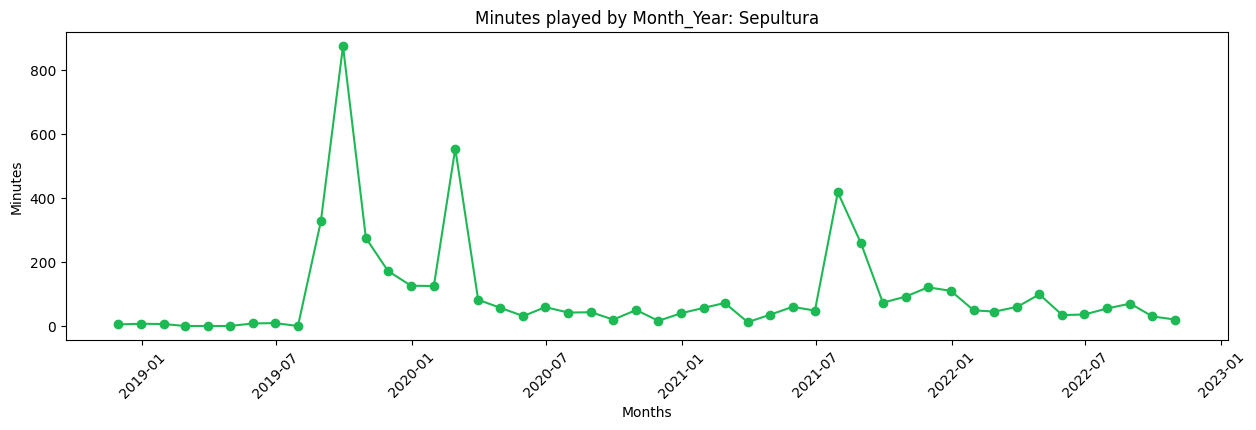

In [25]:
band = input('Write the name of the band: ')


minutes_per_month_band = df.loc[df['master_metadata_album_artist_name'] == str(band)]
minutes_per_month_band = minutes_per_month_band.groupby('Month_Year', as_index=False).sum().round(0)

plt.figure(figsize=(15,4))
plt.title('Minutes played by Month_Year: ' +band)
plt.xlabel('Months')
plt.ylabel('Minutes')
plt.xticks(rotation = 45)
plt.plot_date(minutes_per_month_band['Month_Year'], minutes_per_month_band['minutes_played'], linestyle='-', color='#1DB954')

In this case I wrote the band "Sepultura" in the input box to exemplify

#### 

#### 2.4 Which part of the day I listen the most?

Text(0.5, 1.0, 'Which part of the day I listen the most?')

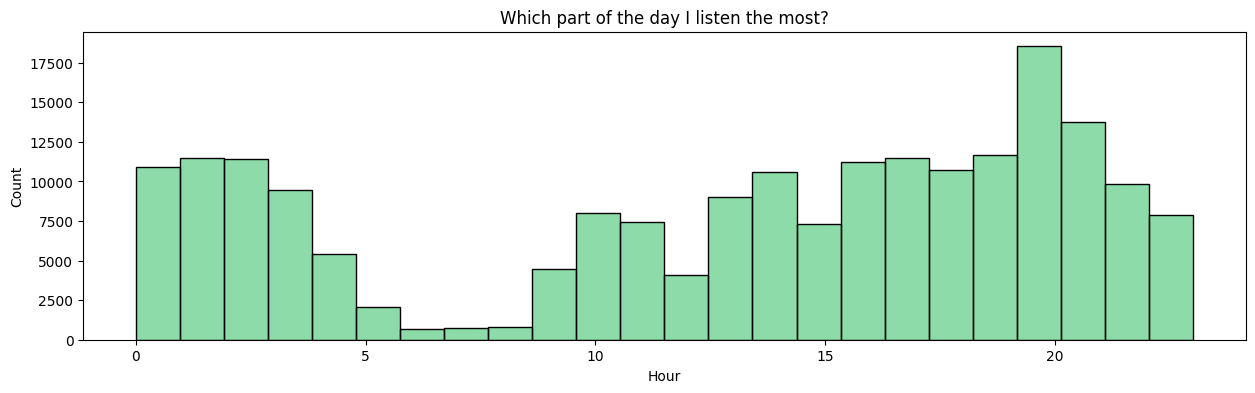

In [26]:

plt.figure(figsize=(15,4))
sns.histplot(data = df['Hour'], bins = 24, color = '#1DB954', alpha = 0.5).set_title('Which part of the day I listen the most?')

As expected, I use to listen at night, when I am at home